In [1]:
!pip install scikit-learn
!pip install seaborn

---
## A. 데이터셋 불러오기
---

In [ ]:
import pandas as pd

# 저장된 데이터셋을 불러오기
file_path = './energy_efficiency_data.csv'

df = pd.read_csv(file_path)
print("로드 성공:")
print(df.head())

데이터 로드 성공:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3  

---
## B. 데이터 전처리
---

##### 데이터 결측치를 확인하는 이유는 데이터셋 내에서 값이 존재하지 않는 부분을 확인해 모델 학습 오류 방지, 모델 성능 저하 방지, 데이터 분석의 왜곡 방지, 정보 손실 최소화하기 위함이다.
##### 확인 결과 데이터셋에 결측치가 없기 때문에 삭제 또는 Simplemputer를 진행하지 않음.

In [3]:
# 데이터 전처리를 위해 먼저 데이터에 결측치를 확인.
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


##### 범주형 변수 인코딩을 진행하는 이유는 범주형 변수가 유한하고 고정된 수의 카테고리 또는 그룹을 나타내는 변수이기 때문이다.(ex: 색상, 도시, 제품 유형 등) 
##### 따라서 범주형 데이터를 모델이 이해하고 처리할 수 있도록 수치 형태로 변환하는 과정이 필수적으로 진행되는데 이 과정이 바로 범주형 변수를 인코딩하는 과정이다.
##### 확인 결과 데이터셋에 범주형 변수는 존재하지 않기 때문에 get_dummies 또는 OneHotEncoder를 따로 진행하지 않음.

In [4]:
# 범주형 변수가 존재하는지 확인
categorical_cols = df.select_dtypes(include='object').columns
print("\n범주형 변수:", categorical_cols)


범주형 변수: Index([], dtype='object')


---
#### 스케일링 진행
#### 머신러인 모델(특히 회귀, KNN, SVM 등)은 입력 변수의 스케일에 영향을 많이 받기 때문에 스케일링이 필요함.
#### 예를 들어, 어떤 변수는 0 ~ 1 사이, 어떤 변수는 1000 ~ 5000 사이, 이렇게 범위가 다르면 모델이 큰 값에는 더 민감하게 반응해서, 학습이 비효율적이거나 성능이 나빠질 수 있기 때문.
---

In [5]:
# 1. 입력(X), 타켓(Y) 나누기
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df[['Heating_Load', 'Cooling_Load']]

---
##### 아래 스케일링 필요 여부를 확인한 결과 
1. Surface_Area는 800 이상.
2. Glazing_Area는 0.4 이하. 
3. Relative_Compactness는 1도 넘지 않음.

#### 따라서 이와 같이 변수 간 단위 차이가 너무 큰 경우 학습에 영향을 주기 때문에 스케일링을 진행하고자 함. 
---

In [6]:
# 2. 스케일링 필요 여부 확인
print("입력 변수 요약 통계:")
display(X.describe())

입력 변수 요약 통계:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [7]:
# 3. 스케일링(StandardScaler) 적용

# 스케일링을 위한 StandardScaler 클래스 가져오기
from sklearn.preprocessing import StandardScaler

# StandardScaler를 하나 만들기, 이는 평균은 0, 표준편차는 1로 값을 바꿔주는 도구임.
scaler = StandardScaler()

# 실제 X(입력 데이터)의 값을 스케일링 진행함. 
# fit : 각 열의 평균과 표준편차를 계산하는 과정,  transform : 계산한 값을 기반으로 스케일링 적용
X_scaled = scaler.fit_transform(X)

---
#### 아래 스케일링의 결과를 보면 
1. mean(평균) = 거의 0
2. std(표준편차) = 거의 1
3. min, max = -1 ~ 2 사이의 값

#### 위와 같이 스케일링이 잘 적용된 것을 확인할 수 있다.
---

In [8]:
# 스케일된 결과를 DataFrame으로 변환 (나중에 보기 쉽게 만들기 위함)
import pandas as pd

# 결과를 보기 쉽게 다시 DataFrame으로 변환
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 스케일된 데이터 확인
print("스케일된 입력 변수 요약 통계:")
display(X_scaled_df.describe())

스케일된 입력 변수 요약 통계:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,7.680000e+02,768.000000
mean,-7.401487e-17,-4.163336e-16,0.000000,2.174187e-16,0.000000,0.000000,1.480297e-16,0.000000
std,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,1.000652,1.000652,1.000652e+00,1.000652
min,-1.363812e+00,-1.785875e+00,-1.685854,-1.470077e+00,-1.000000,-1.341641,-1.760447e+00,-1.814575
25%,-7.725642e-01,-7.421818e-01,-0.561951,-7.915797e-01,-1.000000,-0.670820,-1.009323e+00,-0.685506
50%,-1.340162e-01,2.319318e-02,0.000000,1.583159e-01,0.000000,0.000000,1.173631e-01,0.120972
75%,6.227813e-01,7.885681e-01,0.561951,9.725122e-01,1.000000,0.670820,1.244049e+00,0.766154
max,2.041777e+00,1.553943e+00,2.247806,9.725122e-01,1.000000,1.341641,1.244049e+00,1.411336


---
#### 변수 간 상관관계 확인 및 시각화 진행
---

In [9]:
# 상관계수 행렬 계산
# df는 초기 데이터셋이고 df.corr()을 활용해 각 열(변수)들 사이의 상관관계를 계산하도록 함
corr_matrix = df.corr(numeric_only=True)

# 상관계수 출력
print("상관계수 행렬:")
print(corr_matrix)


상관계수 행렬:
                           Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing_Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing_Area_Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating_Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling_Load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof_Area  Overall_Height   Orientation  \
Relative_Compactness      -8.688234e-01    8.277

---
#### 아래 히트맵을 통해 확인하면 변수 간의 상관관계를 쉽게 확인할 수 있다.
- 색이 빨갛고 값이 1에 가까울수록 -> 두 변수는 같이 증가하거나 같이 감소함 (양의 상관관계)
- 색이 파랗고 값이 -1에 가까울수록 -> 한 변수가 증가할 때 다른 변수는 감소함 (음의 상관관계계)
---

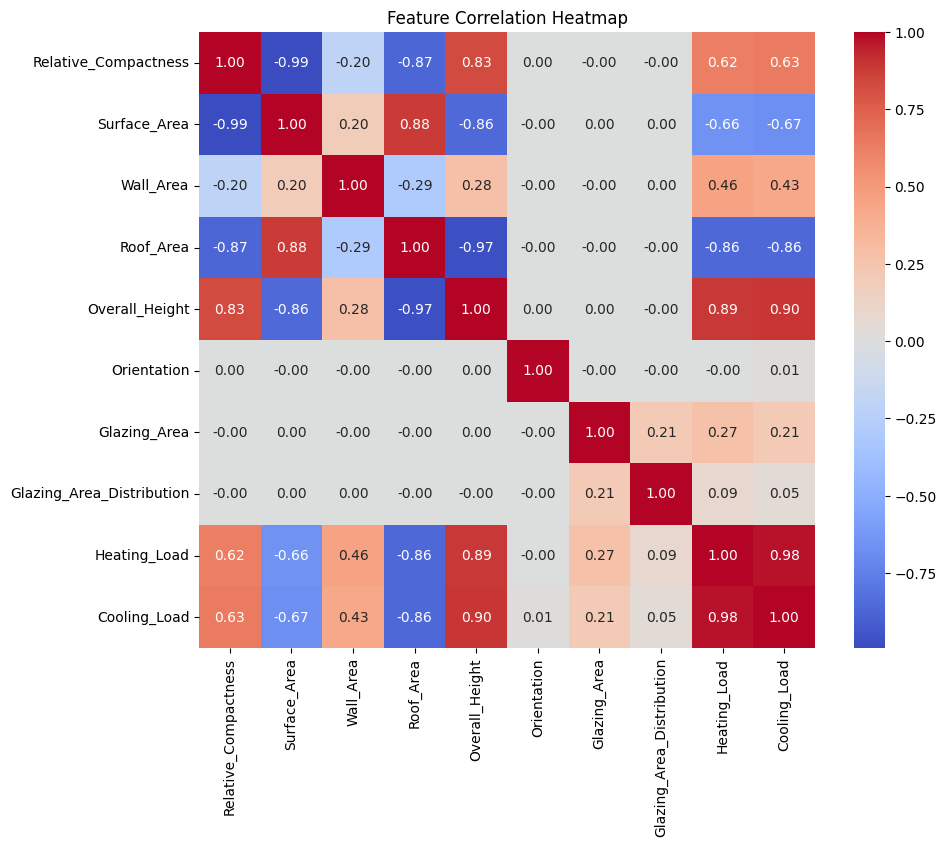

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 위에서 계산한 상관관계를 토대로 히트맵을 활용하여 시각화를 진행

# 히트맵 크기 지정
plt.figure(figsize=(10, 8))

# sns.heatmap()을 활용하여 히트맵을 그림.
# corr_matrix : 상관관계 행렬, 
# annot = True : 각 칸에 상관관계의 숫자를 같이 표시
# cmap='coolwarm' : 양의 상관관계 = 빨간색, 음의 상관관계 =  파란색 표시
# fmt=".2f" : 소수점 둘째 자리까지 표시시
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)


plt.title("Feature Correlation Heatmap")
plt.show()


---

#### 종속 변수 시각화
- 현재 종속 변수는 Heating_Load와 Cooling_Load 2개가 존재하기에 다중 회귀 모델이 아닌 2개의 회귀 모델을 만들고자 함

---

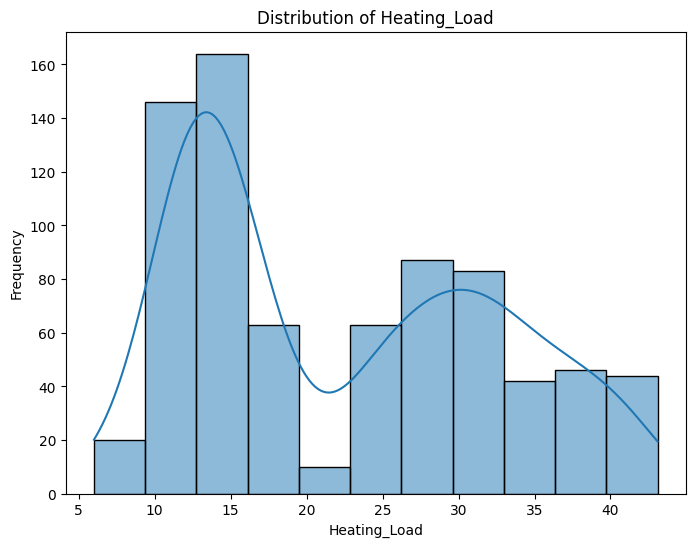

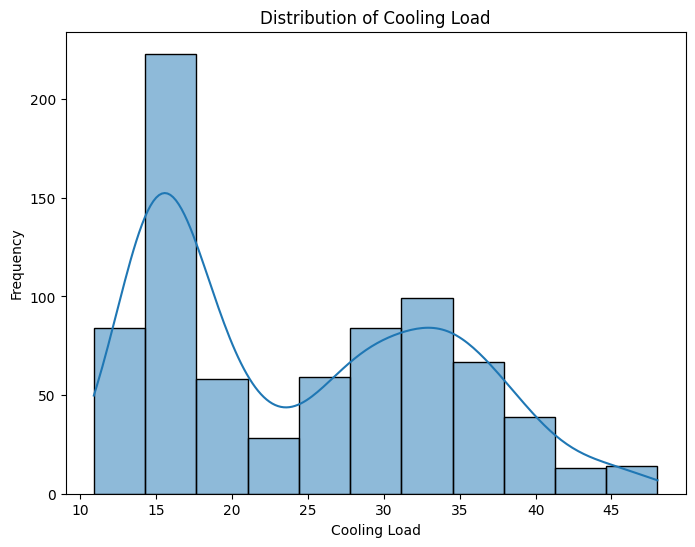

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_data = pd.DataFrame(df)

# Heating_Load 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_data['Heating_Load'], kde=True)
plt.title('Distribution of Heating_Load')
plt.xlabel('Heating_Load')
plt.ylabel('Frequency')
plt.show()

# Cooling_Load 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_data['Cooling_Load'], kde=True)
plt.title('Distribution of Cooling Load')
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.show()

---
## C. 회귀 모델 구현
## D 성능 평가
---

---

#### 모델 설명
1. LinearRegression => 변수들과 타겟 간의 관계가 직선 형태(선형) 라고 가정.
2. Ridge => 선형 회귀 + L2 정규화 (가중치를 너무 크게 하지 않음).
3. Lasso => 선형 회귀 + L1 정규화 (불필요한 변수의 계수를 0으로 만들어서 제거함).
4. DecisionTreeRegressor => 데이터의 규칙을 트리 구조로 나눠서 예측.
5. RandomForestRegressor => 여러 개의 결정 트리를 앙상블해서 평균을 냄.

<span style="color:yellow">

현재 데이터의 경우 
- 변수 간 상관관계가 다양함
- 수치형 변수가 대부분이지만, Orientation, Glazing_Area_Distribution 등 카테고리처럼 보이는 숫자형 변수 존재
- 복잡한 상호작용이 있을 수 있음

따라서 위 근거를 토대로하여

1. LinearRegression
2. RandomForestRegressor

2가지 모델을 선택.

</span>

---

<span style="color:brown">

#### 데이터셋 나누기 = KFold 방식

KFold 방식을 활용 => 데이터를 K개의 부분(Fold)로 나눠서, 그 중 하나는 테스트용, 나머지는 훈련용으로 쓰는 것을 K번 반복하는 방식
즉, 모든 데이터가 테스트셋 역할을 한 번씩 진행하게 됨.

- 이유 : train_test_split은 한 번 나눠서 테스트하여 운이 좋거나 나쁠 수 있음. 하지만 KFold 방식은 여러 번 나눠서 평가를 진행해 더 안정적인 평가가 가능함.

</span>

---

---
<span style="color:orange">

##### 현재 데이터셋은 Heating_Load와 Cooling_Load라는 2개의 타겟 변수가 존재함
##### 따라서 현재 목표는 다중 출력 회귀 모델이 아닌 2개의 타겟 변수를 분리하여 학습을 진행하고자 함

#### - 2개의 모델
1. LinearRegression
2. RandomForestRegressor

#### - 2개의 타겟 변수
1. Heating_Load
2. Cooling_Load

</span>

---

### 목표 : 총 4개의 회귀 모델을 만들고자 함 

<span style="color:yellowgreen">

1. LinearRegression + Heating_Load
2. LinearRegression + Cooling_Load
3. RandomForestRegressor + Heating_Load
4. RandomForestRegressor + Cooling_Load

</span>

---

In [12]:
# 타겟 변수 분류 진행

y_Heating_Load = y["Heating_Load"]
y_Cooling_Load = y["Cooling_Load"]

print(y_Heating_Load.head())
print(y_Cooling_Load.head())

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_Load, dtype: float64
0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling_Load, dtype: float64


In [13]:
# 파이프라인 활용을 위한 함수
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# KFold : 교추 검증을 위한 함수
# cross_val_score = 모델 평가를 위해 사용
# cross_val_predict = 예측값 vs 실제값 산점도를 표현하기 위해 사용
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# 회귀 모델 2가지 불러오는 함수
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 성능 평가를 위한 3가지 평가 지표 => mean_squared_error = MSE, mean_absolute_error = MAE, r2_score = R²
# cross_val_score() 같은 함수는 score가 클수록 좋은 모델이라고 가정하지만 MSE, MAE는 값이 작을수록 좋기 때문에 make_scorer()를 사용하여 평가 지표를 커스터마이징해야 함함
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# 결과 시각화와 수치 계산을 위한 라이브러리리
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams

# 한글 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 음수 기호 표시 문제 해결

# 모델 정의
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42)
}

# KFold 준비
# KFold : KFold 객체를 만들어 데이터를 5등분 하고, 그중 1개를 검증용, 나머지를 학습용으로 반복 사용함.
# shuffle : 데이터를 무작위로 섞고 시작
# random_state : 섞는 순서를 고정 (숫자는 랜덤 시드를 의미함)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

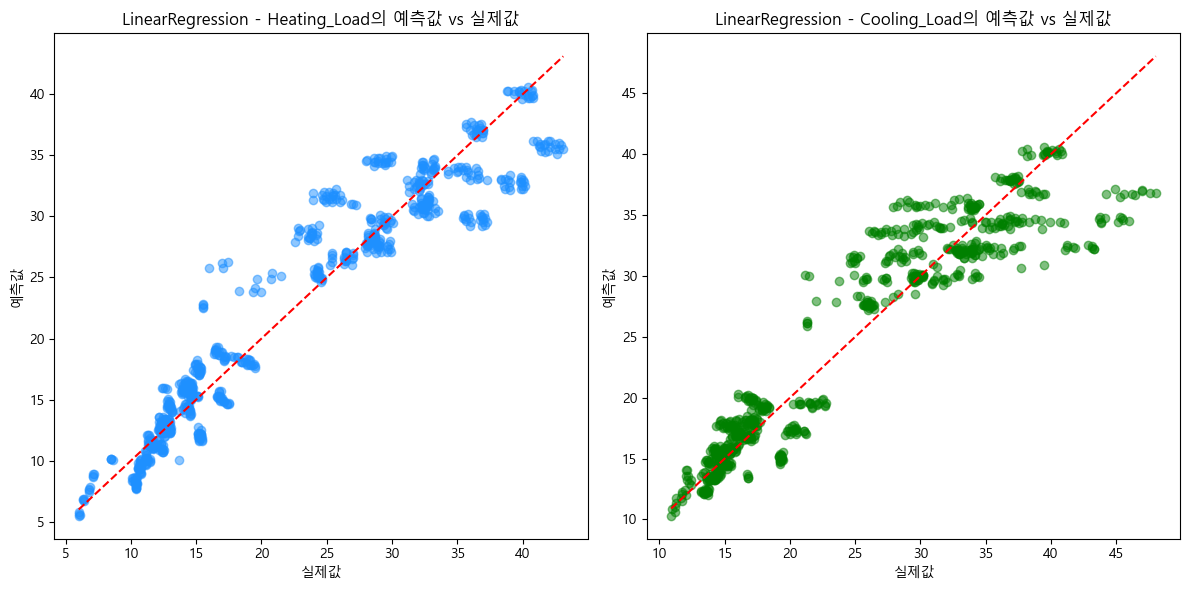

----------------------------------------------------------------------
🔹 LinearRegression - Heating_Load
----------------------------------------------------------------------
  - 평균 RMSE: 2.9405
  - 평균 MAE : 2.0828
  - 평균 R²  : 0.9140
----------------------------------------------------------------------
----------------------------------------------------------------------
🔹 LinearRegression - Cooling_Load
----------------------------------------------------------------------
  - 평균 RMSE: 3.2096
  - 평균 MAE : 2.2649
  - 평균 R²  : 0.8850
----------------------------------------------------------------------


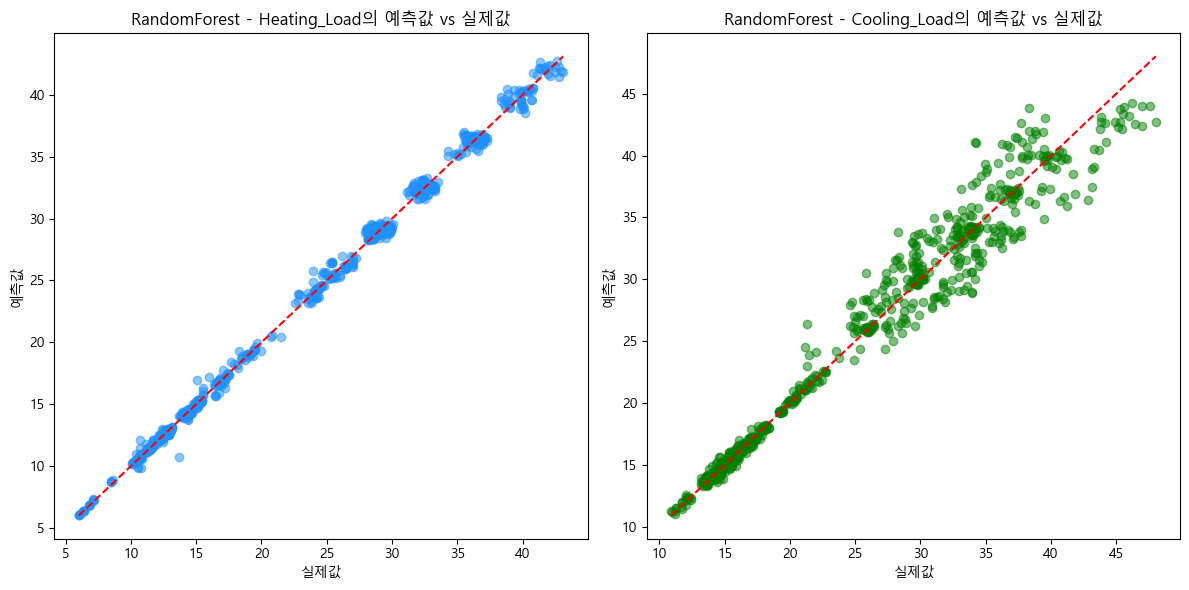

----------------------------------------------------------------------
🔹 RandomForest - Heating_Load
----------------------------------------------------------------------
  - 평균 RMSE: 0.4756
  - 평균 MAE : 0.3243
  - 평균 R²  : 0.9977
----------------------------------------------------------------------
----------------------------------------------------------------------
🔹 RandomForest - Cooling_Load
----------------------------------------------------------------------
  - 평균 RMSE: 1.6327
  - 평균 MAE : 1.0036
  - 평균 R²  : 0.9700
----------------------------------------------------------------------


In [14]:
# 성능 평가 지표 함수 정의
# RMSE는 루트를 씌워서 직접 정의하도록 함함
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scorer 정의
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# 각 모델에 대해 평가
for name, model in models.items():
    
    # 이미 데이터 전처리 부분에서 스케일링을 진행했지만 이런 경우 X_test의 값이 X_train을 기준으로 정규화된 것이 아니라 X_test의 정보가 미리 모델에 들어가게 됨 => 데이터 누수 발생
    # 따라서 파이프라인을 활용하여 X_test가 자신을 기준으로 스케일링 되지 않고 X_train의 평균/표준편차만을 기준으로 변환되어 평가 데이터(X_test)의 정보가 모델 학습에 새어나가는 것을 막을 수 있음
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # cross_val_predict 사용하여 예측값 추출
    y_pred_Heating_Load = cross_val_predict(pipeline, X, y_Heating_Load, cv=kf)
    
    y_pred_Cooling_Load = cross_val_predict(pipeline, X, y_Cooling_Load, cv=kf)

    # Heating_Load 예측값 vs 실제값 산점도
    plt.figure(figsize=(12, 6))  # 하나의 그림에 두 개의 subplot을 그리기 위해 figure 크기 조정

    plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
    plt.scatter(y_Heating_Load, y_pred_Heating_Load, color='dodgerblue', alpha=0.5)
    plt.plot([y_Heating_Load.min(), y_Heating_Load.max()], [y_Heating_Load.min(), y_Heating_Load.max()], color='red', linestyle='--')  # 완벽한 예측선
    plt.title(f"{name} - Heating_Load의 예측값 vs 실제값")
    plt.xlabel('실제값')
    plt.ylabel('예측값')

    # Cooling_Load 예측값 vs 실제값 산점도
    plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
    plt.scatter(y_Cooling_Load, y_pred_Cooling_Load, color='green', alpha=0.5)
    plt.plot([y_Cooling_Load.min(), y_Cooling_Load.max()], [y_Cooling_Load.min(), y_Cooling_Load.max()], color='red', linestyle='--')  # 완벽한 예측선
    plt.title(f"{name} - Cooling_Load의 예측값 vs 실제값")
    plt.xlabel('실제값')
    plt.ylabel('예측값')

    plt.tight_layout()  # subplot 간 간격 자동 조정
    plt.show()
    
    # Heating_Load에 대한 평가 지표 계산
    rmse_scores_H = cross_val_score(pipeline, X, y_Heating_Load, cv=kf, scoring=rmse_scorer)
    mae_scores_H = cross_val_score(pipeline, X, y_Heating_Load, cv=kf, scoring=mae_scorer)
    r2_scores_H = cross_val_score(pipeline, X, y_Heating_Load, cv=kf, scoring=r2_scorer)
    
    # Cooling_Load에 대한 평가 지표 계산
    rmse_scores_C = cross_val_score(pipeline, X, y_Cooling_Load, cv=kf, scoring=rmse_scorer)
    mae_scores_C = cross_val_score(pipeline, X, y_Cooling_Load, cv=kf, scoring=mae_scorer)
    r2_scores_C = cross_val_score(pipeline, X, y_Cooling_Load, cv=kf, scoring=r2_scorer)
    
    
    # Heating_Load에 대한 모델 평가 출력
    print("-------" * 10)    
    print(f"🔹 {name} - Heating_Load")
    
    # 오차 지표는 앞에 -를 붙인 -np.mean()를 통해 양수로 보기 쉽도록 출력
    print("-------" * 10)
    print(f"  - 평균 RMSE: {-np.mean(rmse_scores_H):.4f}")
    print(f"  - 평균 MAE : {-np.mean(mae_scores_H):.4f}")
    print(f"  - 평균 R²  : {np.mean(r2_scores_H):.4f}")
    print("-------" * 10)
    
    
    # Cooling_Load에 대한 모델 평가 출력
    print("-------" * 10)    
    print(f"🔹 {name} - Cooling_Load")
    print("-------" * 10)
    print(f"  - 평균 RMSE: {-np.mean(rmse_scores_C):.4f}")
    print(f"  - 평균 MAE : {-np.mean(mae_scores_C):.4f}")
    print(f"  - 평균 R²  : {np.mean(r2_scores_C):.4f}")
    print("-------" * 10)

---
## E. 하이퍼파라미터 튜닝
---

---

### 하이퍼파라미터 튜닝 방법 2가지

<span style="color:yellowgreen"> GridSearchCV랑 RandomizedSearchCV는 머신러닝 모델의 성능을 극대화하기 위해 "최적의 하이퍼파라미터"를 찾아주는 도구 </span>

<span style="color:orange">

1. GridSearchCV : 모든 조합을 다 해보는 방식

- 우리가 설정한 파라미터 범위에 대해 모든 조합을 하나씩 전부 시도
- 계산량이 많아서 하이퍼파라미터 공간이 크면 시간이 많이 걸릴 수 있음

2. RandomizedSearchCV : 파라미터 공간에서 일정 횟수만큼 랜덤하게 샘플링해서 테스트

- 하이퍼파라미터 값의 랜덤 샘플을 선택하여 시도
- 전체 조합 다 안 해도 좋은 결과를 찾는 게 목표, but 완벽한 최적 조합을 못 찾을 수도 있음

</span>

---

In [15]:
# 각 모델에 대해 존재하는 파라미터 값 확인
print("LinearRegression의 파라미터 :" )
print(LinearRegression().get_params())

print("-----" * 30)

print("RandomForestRegressor의 파라미터 :" )
print(RandomForestRegressor().get_params())

LinearRegression의 파라미터 :
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForestRegressor의 파라미터 :
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


---
위 코드에서 확인할 수 있듯이 RandomForestRegressor에 대해서는 다양한 파라미터가 존재하지만 LinearRegression에는 조정할 수 있는 파라미터가 fit_intercept와 positive 2개 밖에 존재하지 않음.

- fit_intercept	절편을 포함할지 여부 (True/False)
- positive	가중치를 양수로 제한할지 여부 (False 기본값)

#### 하지만 일반적인 회귀 문제의 경우 이를 바꿔도 성능에 큰 영향이 없음.
#### 따라서 LinearRegression의 경우 성능 차이가 없을 수 있음.
---

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# RMSE 함수 정의
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scorer 정의
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# KFold 정의
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장용 딕셔너리
results = {}

In [17]:
# -------------------------
# 1. LinearRegression 평가
# -------------------------
for target_name, target_data in zip(["Heating_Load", "Cooling_Load"], [y_Heating_Load, y_Cooling_Load]):
    
    # 파이프라인 정의
    lr_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LinearRegression())
    ])
    
    # 파라미터 그리드
    # LinearRegression에서 튜닝할 수 있는 소수의 파라미터
    # - fit_intercept: 절편을 계산할 것인지 (보통 True가 적절)
    # - positive: 회귀 계수를 양수로만 제한할지 여부 (특수한 경우에만 True)
    lr_param_grid = {
        "lr__fit_intercept": [True, False],
        "lr__positive": [True, False]
    }
    
    # GridSearchCV로 튜닝
    lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=kf, scoring=rmse_scorer)
    lr_grid.fit(X, target_data)
    best_lr_model = lr_grid.best_estimator_

    # 동일한 방식으로 성능 평가
    rmse_scores = cross_val_score(best_lr_model, X, target_data, cv=kf, scoring=rmse_scorer)
    mae_scores = cross_val_score(best_lr_model, X, target_data, cv=kf, scoring=mae_scorer)
    r2_scores = cross_val_score(best_lr_model, X, target_data, cv=kf, scoring=r2_scorer)

    results[f"LinearRegression_{target_name}"] = {
        "best_params": lr_grid.best_params_,
        "rmse": -np.mean(rmse_scores),
        "mae": -np.mean(mae_scores),
        "r2": np.mean(r2_scores)
    }

In [18]:
# ---------------------------------
# 2. RandomForestRegressor 평가
# ---------------------------------

# RandomForest의 주요 파라미터:
# - n_estimators: 만들어질 트리의 개수 (많을수록 안정되지만 느려짐)
# - max_depth: 각 트리의 최대 깊이 (과적합 방지용)
# - min_samples_split: 노드를 분할하기 위한 최소 샘플 수 (값이 클수록 모델이 덜 복잡해짐)
# - min_samples_leaf: 리프 노드에 있어야 할 최소 샘플 수 (값이 클수록 일반화 능력 증가)
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300, 400, 500],     # 트리 수 (모델 안정성 증가 vs 속도 감소)
    'rf__max_depth': [None, 10, 20, 30, 40, 50],        # 트리 최대 깊이 (None이면 제한 없음 → 과적합 위험 증가)
    'rf__min_samples_split': [2, 5, 10, 15],    # 내부 노드 분할 최소 샘플 수
    'rf__min_samples_leaf': [1, 2, 4, 6]       # 리프 노드 최소 샘플 수 (값이 클수록 과적합 방지)
}

for target_name, target_data in zip(["Heating_Load", "Cooling_Load"], [y_Heating_Load, y_Cooling_Load]):
    
    rf_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("rf", RandomForestRegressor(random_state=42))
    ])
    
    rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
    rf_grid.fit(X, target_data)
    best_rf_model = rf_grid.best_estimator_

    # 동일한 방식으로 성능 평가
    rmse_scores = cross_val_score(best_rf_model, X, target_data, cv=kf, scoring=rmse_scorer)
    mae_scores = cross_val_score(best_rf_model, X, target_data, cv=kf, scoring=mae_scorer)
    r2_scores = cross_val_score(best_rf_model, X, target_data, cv=kf, scoring=r2_scorer)

    results[f"RandomForest_{target_name}"] = {
        "best_params": rf_grid.best_params_,
        "rmse": -np.mean(rmse_scores),
        "mae": -np.mean(mae_scores),
        "r2": np.mean(r2_scores)
    }

##### RMSE (Root Mean Squared Error) 
##### => 예측값과 실제값 사이 오차의 제곱 평균의 제곱근	작을수록 좋음

---

##### MAE (Mean Absolute Error) 
##### => 예측값과 실제값 사이 오차의 절댓값 평균	작을수록 좋음

---

##### R² (R-squared, 결정계수) 
##### => 모델이 데이터를 얼마나 잘 설명하는지 비율 (0 ~ 1 사이)	클수록 좋음

In [19]:
# --------------------------
# 결과 출력
# --------------------------
for name, metrics in results.items():
    print(f"🔹 {name}")
    print(f"  - Best Params: {metrics['best_params']}")
    print(f"  - 평균 RMSE: {metrics['rmse']:.4f}")
    print(f"  - 평균 MAE : {metrics['mae']:.4f}")
    print(f"  - 평균 R²  : {metrics['r2']:.4f}")
    print("-" * 70)

🔹 LinearRegression_Heating_Load
  - Best Params: {'lr__fit_intercept': True, 'lr__positive': False}
  - 평균 RMSE: 2.9405
  - 평균 MAE : 2.0828
  - 평균 R²  : 0.9140
----------------------------------------------------------------------
🔹 LinearRegression_Cooling_Load
  - Best Params: {'lr__fit_intercept': True, 'lr__positive': False}
  - 평균 RMSE: 3.2096
  - 평균 MAE : 2.2649
  - 평균 R²  : 0.8850
----------------------------------------------------------------------
🔹 RandomForest_Heating_Load
  - Best Params: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
  - 평균 RMSE: 0.4745
  - 평균 MAE : 0.3240
  - 평균 R²  : 0.9978
----------------------------------------------------------------------
🔹 RandomForest_Cooling_Load
  - Best Params: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}
  - 평균 RMSE: 1.6262
  - 평균 MAE : 1.0010
  - 평균 R²  : 0.9703
-------------------------------------------------

---
#### 결과
- 하이퍼파라미터 튜닝 결과 RandomForest 모델에 대해서만 RMSE와 MAE가 감소하고 R²이 증가한 것을 확인함
- 반면 LinearRegression 모델에서는 차이를 발견하지 못함

---